# Data Visualization of Bike Sharing Data

In [3]:
pip install tabulate

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import numpy as np

# Read the CSV file
bike = pd.read_csv("bergen_merged.csv")

# Convert the relevant columns to categorical type
bike['start_station_name'] = bike['start_station_name'].astype('category')
bike['end_station_name'] = bike['end_station_name'].astype('category')
bike['season'] = bike['season'].astype('category')
bike['weather'] = bike['weather'].astype('category')
bike['start_station_id'] = bike['start_station_id'].astype('category')
bike['end_station_id'] = bike['end_station_id'].astype('category')

# Display the first few rows to check
print(bike.head())

            start_time             end_time  duration start_station_id  \
0  2023-01-01 04:00:00  2023-01-01 04:00:00       629              150   
1  2023-01-01 04:00:00  2023-01-01 04:00:00       107             1894   
2  2023-01-01 04:00:00  2023-01-01 04:00:00       643             1894   
3  2023-01-01 05:00:00  2023-01-01 05:00:00       227              797   
4  2023-01-01 05:00:00  2023-01-01 06:00:00       254               22   

  start_station_name  start_station_latitude  start_station_longitude  \
0             Torget               60.395878                 5.325284   
1   Kong Oscars gate               60.393323                 5.330654   
2   Kong Oscars gate               60.393323                 5.330654   
3   John Lunds plass               60.388247                 5.324558   
4            Skur 11               60.396384                 5.324169   

  end_station_id     end_station_name  end_station_latitude  \
0           1896  Takhagen på Nordnes             60.

In [4]:
from tabulate import tabulate

# Define the data description
describe_bike = pd.DataFrame({
    'Variables': bike.columns,
    'Description': [
        "Timestamp of when the trip started (YYYY-MM-DD HH:00:00)",
        "Timestamp of when the trip ended (YYYY-MM-DD HH:00:00)",
        "Duration of trip (s)",
        "Unique ID of start station",
        "Name of start station",
        "Latitude of start station",
        "Longitude of start station",
        "Unique ID of end station",
        "Name of end station",
        "Latitude of end station",
        "Longitude of end station",
        "Amount of precipitation per hour (mm)",
        "Air temperature at time of observation (°C)",
        "Maximum mean wind speed per hour (m/s)",
        "Weather symbol code from Yr.no (0-50)",
        "Sunshine duration per hour (min)",
        "Season code (0=Spring, 1=Summer, 2=Fall, 3=Winter)",
        "Public holiday in Norway",
        "Weekend - Saturday and Sunday"
    ],
    'Type': bike.dtypes.astype(str)  # Converting the data types to string for display
})

# Display the table in a pretty format using tabulate
print(tabulate(describe_bike, headers='keys', tablefmt='grid', showindex=False))


+-------------------------+----------------------------------------------------------+----------+
| Variables               | Description                                              | Type     |
+=========================+==========================================================+==========+
| start_time              | Timestamp of when the trip started (YYYY-MM-DD HH:00:00) | object   |
+-------------------------+----------------------------------------------------------+----------+
| end_time                | Timestamp of when the trip ended (YYYY-MM-DD HH:00:00)   | object   |
+-------------------------+----------------------------------------------------------+----------+
| duration                | Duration of trip (s)                                     | int64    |
+-------------------------+----------------------------------------------------------+----------+
| start_station_id        | Unique ID of start station                               | category |
+-------------------

## Data Wrangling

In [5]:
# Ensure the 'start_time' column is in datetime format
bike['start_time'] = pd.to_datetime(bike['start_time'])

# Add year, month, day, hour, and day_of_week columns
bike['year'] = bike['start_time'].dt.year
bike['month'] = pd.Categorical(bike['start_time'].dt.strftime('%m'), categories=[f'{i:02d}' for i in range(1, 13)], ordered=True)
bike['day'] = bike['start_time'].dt.day
bike['hour'] = bike['start_time'].dt.hour
bike['day_of_week'] = pd.Categorical(bike['start_time'].dt.day_name(), categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], ordered=True)

# Display the selected columns
print(bike[['start_time', 'year', 'month', 'day', 'hour', 'day_of_week']].head())

           start_time  year month  day  hour day_of_week
0 2023-01-01 04:00:00  2023    01    1     4      Sunday
1 2023-01-01 04:00:00  2023    01    1     4      Sunday
2 2023-01-01 04:00:00  2023    01    1     4      Sunday
3 2023-01-01 05:00:00  2023    01    1     5      Sunday
4 2023-01-01 05:00:00  2023    01    1     5      Sunday


In [8]:
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    
    # Convert latitude and longitude from degrees to radians
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    # Distance in kilometers
    distance = R * c
    
    return distance

# Add the 'distance' column to the bike dataframe
bike['distance'] = haversine_distance(bike['start_station_latitude'], bike['start_station_longitude'], 
                                      bike['end_station_latitude'], bike['end_station_longitude'])

# Display the selected columns
print(bike[['start_station_name', 'start_station_latitude', 'start_station_longitude', 
            'end_station_name', 'end_station_latitude', 'end_station_longitude', 'distance']].head())

  start_station_name  start_station_latitude  start_station_longitude  \
0             Torget               60.395878                 5.325284   
1   Kong Oscars gate               60.393323                 5.330654   
2   Kong Oscars gate               60.393323                 5.330654   
3   John Lunds plass               60.388247                 5.324558   
4            Skur 11               60.396384                 5.324169   

      end_station_name  end_station_latitude  end_station_longitude  distance  
0  Takhagen på Nordnes             60.398865               5.306411  1.088547  
1     Kong Oscars gate             60.393323               5.330654  0.000000  
2      Skutevikstorget             60.402229               5.320745  1.129980  
3              Skur 11             60.396384               5.324169  0.905035  
4     Hans Hauges gate             60.401906               5.324748  0.614762  


## Summary Statistics

In [10]:
# Filter the numeric columns from the bike dataframe
numeric_columns = bike.select_dtypes(include=[np.number])

# Summary statistics for numeric columns
bike_summary = numeric_columns.describe().transpose().reset_index()

# Add missing values count for numeric columns only
bike_summary['Missing'] = numeric_columns.isnull().sum().values

# Rename the columns to match the original output structure
bike_summary = bike_summary.rename(columns={
    'index': 'Variables',
    'min': 'Min',
    'mean': 'Mean',
    '50%': 'Median',
    'max': 'Max',
    'std': 'SD'
})

# Add data type column (they are all numeric)
bike_summary['Type'] = 'numeric'

# Select only relevant columns for the summary table
bike_summary = bike_summary[['Type', 'Variables', 'Missing', 'Min', 'Mean', 'Median', 'Max', 'SD']]

# Display the summary in a formatted table
print(tabulate(bike_summary, headers='keys', tablefmt='grid', showindex=False, floatfmt=".4f"))

+---------+-------------------------+-----------+---------+----------+----------+------------+----------+
| Type    | Variables               |   Missing |     Min |     Mean |   Median |        Max |       SD |
+=========+=========================+===========+=========+==========+==========+============+==========+
| numeric | duration                |         0 | 61.0000 | 616.4878 | 467.0000 | 61557.0000 | 617.6880 |
+---------+-------------------------+-----------+---------+----------+----------+------------+----------+
| numeric | start_station_latitude  |         0 | 60.3410 |  60.3880 |  60.3889 |    60.4233 |   0.0098 |
+---------+-------------------------+-----------+---------+----------+----------+------------+----------+
| numeric | start_station_longitude |         0 |  5.2732 |   5.3271 |   5.3257 |     5.3612 |   0.0127 |
+---------+-------------------------+-----------+---------+----------+----------+------------+----------+
| numeric | end_station_latitude    |         

## Distance by seasons

The median and variability of distances traveled by cyclists are consistent throughout the seasons, indicating stable biking patterns. However, the box plot reveals numerous outliers, suggesting that while most trips range from 0.5 to 1.5 km, some cyclists undertake much longer journeys. Summer sees the longest distances, with certain trips exceeding 8 km, likely due to favorable weather and extended daylight hours. Similarly, winter also shows significant distances, with some rides going over 6 km. Overall, while average distances remain comparable, the presence of outlier trips highlights variability in biking behavior, especially in the summer months.

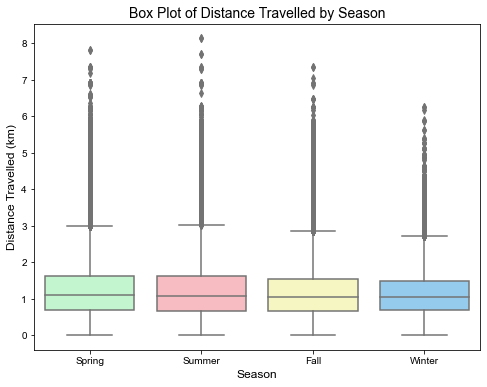

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set custom colors for the boxplot
custom_palette = ["#BAFFC9", "#FFB3BA", "#FFFFBA", "#87CEFA"]

# Create the boxplot using seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(data=bike, x='season', y='distance', palette=custom_palette)

# Customize the labels and title
plt.title('Box Plot of Distance Travelled by Season', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Distance Travelled (km)', fontsize=12)

# Set custom labels for the x-axis (seasons)
plt.xticks(ticks=[0, 1, 2, 3], labels=["Spring", "Summer", "Fall", "Winter"])

# Apply minimal theme (similar to theme_minimal() in ggplot)
sns.set_style("whitegrid")

# Show the plot
plt.show()

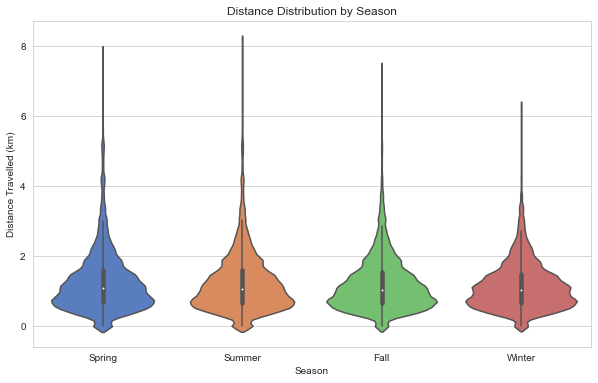

In [19]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='season', y='distance', data=bike, palette='muted')
plt.title('Distance Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Distance Travelled (km)')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

## Monthly Rentals Over the Year

### Summer Peaks: 

* The surge in rentals during the summer months is likely due to several factors: 
Favorable Weather: Longer days and warmer temperatures encourage outdoor activities, leading to increased biking. 
* Tourism: Summer often brings more tourists to urban areas, and bike rentals can be an attractive option for exploring cities. 

### Winter Drops: 
The significant decline in rentals during winter may be attributed to: Cold Weather: Harsh weather conditions deter people from biking.

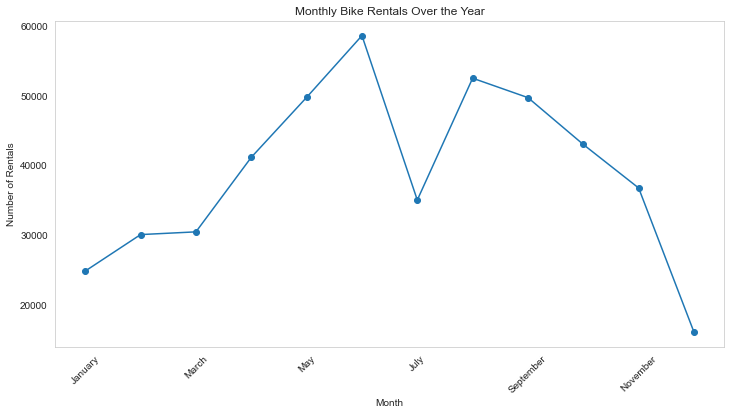

In [23]:
bike_pd = pd.DataFrame(bike)

# Create a new column for the month (as a string for proper ordering)
bike_pd['month'] = bike_pd['start_time'].dt.month_name()

# Group by month and count rentals
monthly_rentals = bike_pd.groupby('month').size().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Plotting the monthly rentals
plt.figure(figsize=(12, 6))
monthly_rentals.plot(kind='line', marker='o')
plt.title('Monthly Bike Rentals Over the Year')
plt.xlabel('Month')
plt.ylabel('Number of Rentals')
plt.xticks(rotation=45)
plt.grid()
plt.show()

## Top 5 departure stations

Bergen’s bike rental stations are well-distributed across the city's east and west sides, serving various areas. The most popular departure station, Møllendalsplass, recorded an impressive 14,688 rentals, benefiting from its east-side location near residential and industrial zones, making it accessible for locals. Close behind are Nykirken, St. Jakobs Plass, Torgallmenningen, and C. Sundts gate, with 12,306, 12,211, 11,983, and 10,010 rentals, respectively. This data underscores the strong demand for bike-sharing services in both residential and commercial districts of Bergen, reflecting the city's commitment to promoting sustainable transportation options.

In [16]:
import folium

# Group by departure station and calculate the number of rentals
top_stations = (bike.groupby(['start_station_name', 'start_station_latitude', 'start_station_longitude'])
                 .size()
                 .reset_index(name='count')
                 .sort_values(by='count', ascending=False)
                 .head(5))

# Create a base map centered around Bergen
map_center = [top_stations['start_station_latitude'].mean(), top_stations['start_station_longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=13)

# Add markers for the top 5 departure stations
for _, row in top_stations.iterrows():
    folium.Marker(
        location=[row['start_station_latitude'], row['start_station_longitude']],
        popup=f"{row['start_station_name']}  ({row['count']})",
        icon=folium.Icon(color='red'),
    ).add_to(m)

# Add a title control to the map
folium.map.LayerControl().add_to(m)
title = "TOP 5 DEPARTURE STATIONS OF BERGEN BIKE RENTAL IN 2023"
folium.Marker(
    location=map_center,
    icon=folium.DivIcon(
        html=f'<div style="font-size: 14px; color: black;"><b>{title}</b></div>',
    )
).add_to(m)

# Display the map
m.save('top_departure_stations_map.html')
m

## Heat map by hour and day

1. Daily Usage Patterns

Morning Peaks (6-7 AM):

Commuting: The high rental rates during the morning hours suggest that many users are likely commuting to work or school. This period aligns with typical rush hour traffic, indicating that biking is a preferred mode of transportation for some individuals.
Health and Fitness: Some users may also be taking advantage of the cooler morning temperatures for fitness activities before the heat of the day.
Afternoon Peaks (1-4 PM):

Post-Work/School Commute: The increase in rentals during this time likely reflects individuals returning from work or school. It suggests that biking is a popular option for commuting home after a day of work or study.
Recreational Use: This period may also see recreational riders taking advantage of the late afternoon hours for leisure biking as temperatures start to cool down.

2. Weekly Usage Patterns

High Usage on Weekdays (Monday to Friday):
Consistent Commuting: The data indicating higher rentals on these weekdays suggests that commuters prefer biking as part of their routine, likely due to work schedules.
Less Weekend Activity: A drop in rentals during the weekends could indicate that people prefer other activities, such as family outings, longer trips, or leisure activities that do not involve biking.

3. Implications for Bike Rental Services

Operational Strategies:

Increase Bike Availability: To meet demand during peak hours, consider ensuring a higher availability of bikes during morning and afternoon rush hours.
Adjust Pricing or Promotions: Introduce pricing strategies or promotions specifically targeting commuters, such as monthly passes or discounts for morning and afternoon rentals.

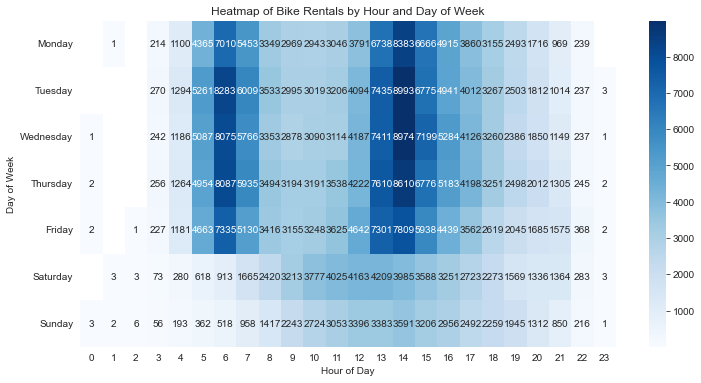

In [22]:
bike_pd = pd.DataFrame(bike)

# Convert 'start_time' to datetime
bike_pd['start_time'] = pd.to_datetime(bike_pd['start_time'])

bike_pd['hour'] = bike_pd['start_time'].dt.hour
bike['day_of_week'] = bike_pd['start_time'].dt.day_name()

# Create a pivot table for the heatmap
heatmap_data = bike_pd.pivot_table(index='day_of_week', columns='hour', values='start_time', aggfunc='count')

# Sort days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(days_order)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='g')
plt.title('Heatmap of Bike Rentals by Hour and Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

## Trip Durations

The distribution of trip durations, helping to understand user behavior regarding trip lengths. We can see that most trips are very short

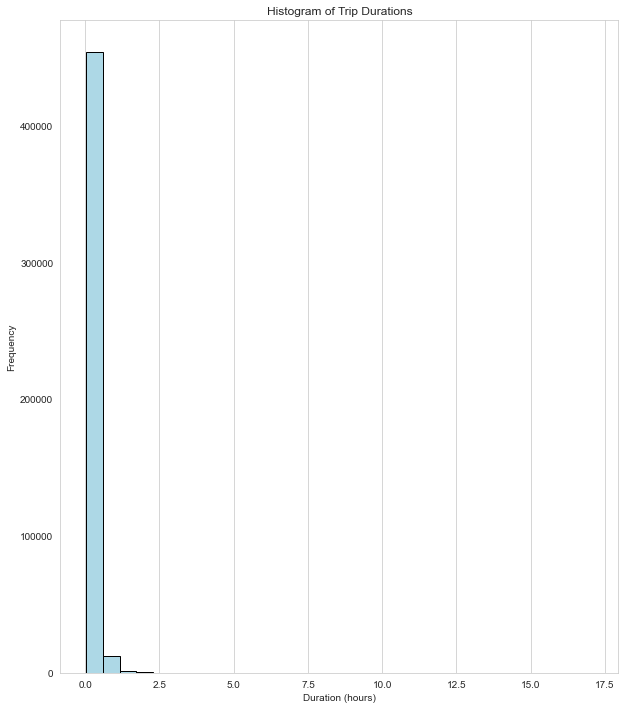

In [36]:
plt.figure(figsize=(10, 12))
plt.hist(bike['duration']/3600.0, bins=30, color='lightblue', edgecolor='black')
plt.title('Histogram of Trip Durations')
plt.xlabel('Duration (hours)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()